In [2]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Now you have visualized the utility network as well as water flor from immediate sources, we will analyze differences between years in energy consumption. We will be looking at the actual 2010 data, actual 2015 data, and the 2015 data predicted in 2010.



## Extract 2010 data and 2015 data

We will import data from 2010 and 2015 utility network data. Each table will have a year column, which shows the current year and the future years used for prediction. The data_year column is the year that the values were measured and will be used for future prediction. The source column shows where the water is transported from and target column shows the receiving utility from its source. The cumulative_volume_af colume shows the total amount of volume transported from source and target. The transmission_kwh/af column shows the amount of energy used during the transmission, where kWh/AF = kiloWatt-hours required to pump an acre-foot of water through the irrigation system. Each row contains information on water flow and energy use between a water source and its target (utility).

### Data
This is the data observed in 2010 and 2015 for the utilties we are observing!

In [80]:
data = Table().read_table('network.csv')
data

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1801001PD,1801001E,1624,163.1,0,1624
2010,2010,1801007PD,1801007E,2015.2,163.1,0,2015.2
2010,2010,1801009PD,1801009E,2924.55,163.1,0,2924.55
2010,2010,1801011PD,1801011E,1350,163.1,0,1350
2010,2010,1801015PD,1801015E,840,163.1,0,840
2010,2010,1801017PD,1801017E,1798.34,163.1,0,1798.34
2010,2010,1801019PD,1801019E,1414.56,163.1,0,1414.56
2010,2010,1801021NPD,1801021E,710,195.72,0,710
2010,2010,1801021PD,1801021E,3098.08,163.1,0,3098.08
2010,2010,1801023NPD,1801023E,204,195.72,0,204


## Actual 2010 Data

Let's get the actual observed data in 2010. By setting the column of the data table as 2010, we will be looking at the actual 2010 data.

In [82]:
#Getting data for 2010.
#data_2010 = network.where('year',are.equal_to(2010))
data_2010 = data.where('year', are.equal_to('2010'))
data_2010

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1801001PD,1801001E,1624,163.1,0,1624
2010,2010,1801007PD,1801007E,2015.2,163.1,0,2015.2
2010,2010,1801009PD,1801009E,2924.55,163.1,0,2924.55
2010,2010,1801011PD,1801011E,1350,163.1,0,1350
2010,2010,1801015PD,1801015E,840,163.1,0,840
2010,2010,1801017PD,1801017E,1798.34,163.1,0,1798.34
2010,2010,1801019PD,1801019E,1414.56,163.1,0,1414.56
2010,2010,1801021NPD,1801021E,710,195.72,0,710
2010,2010,1801021PD,1801021E,3098.08,163.1,0,3098.08
2010,2010,1801023NPD,1801023E,204,195.72,0,204


## Let's try extracting data for a specific utility.
### This is an example for Cerritos (1807057E).
We will first get the 2010 data for Cerritos utility by setting the target column to be equal to the utility code.
##### Cerritos

In [46]:
#Actual 2010 data for Cerritos utility
cerritos = data_2010.where("target",are.equal_to("1807057E"))
cerritos

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870
2010,2010,1807057PD,1807057E,6048,163.1,0,6048


#### Sort by the amount of cumulative volume

By sorting the table by the amount of cumulative volume, we can see which source the target received most amount of water from.

In [47]:
#where do they get most water?
cerritos = cerritos.sort('cumulative_volume_af', descending = True)
cerritos

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057PD,1807057E,6048,163.1,0,6048
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870


## Try your own!

### Find the 2010 data for your utility.

##### Utility

In [8]:
#Find the actual 2010 for your utility
utility = data.where("target",are.equal_to("YOUR UTILITY CODE"))
utility

##### Sort by the amount of cumulative volume.

In [ ]:
#where do they get most water?
utility = utility.sort(...)
utility

## Actual 2015 Data
We will now get the actual 2015 data by finding the rows in data_1 table where the year is equal to 2015.

In [49]:
#Getting data for 2015.
data_2015 = data.where('year',are.equal_to('2015'))
data_2015

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1803007PD,1803007E,3145.61,17.6,0,3145.61
2015,2015,1803009PD,1803009E,55032,1284,0,55032
2015,2015,1803013PD,1803013E,688,2000,0,688
2015,2015,1803015PD,1803015E,3952,17.6,0,3952
2015,2015,1803017PD,1803017E,24854,17.6,0,24854
2015,2015,1803019NPD,1803019E,2143,42.24,0,2143
2015,2015,1803019PD,1803019E,11704.7,35.2,0,11704.7
2015,2015,1803027PD,1803027E,4842.57,17.6,0,4842.57
2015,2015,1803029PD,1803029E,7502,35.2,0,7502
2015,2015,1803033NPD,1803033E,15022,84.48,0,15022


## Extracting data in 2015 for Cerritos (1807057E)
Let's get the 2015 data for Cerritos utility by setting the target column to be equal to its utility code.

##### Cerritos

In [50]:
cerritos_2015 = data_2015.where("target", are.equal_to("1807057E"))
cerritos_2015


year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1807057NPD,1807057E,2335,195.72,0,2335
2015,2015,1807057PD,1807057E,8460,326.2,0,8460


## Try extracting 2015 data for your own utility!
Similar to what you did for the 2010 data, find where the target column is equal to your utility code.

##### Utility

In [10]:
#Data where target = YOUR UTILITY CODE
utility_2015 = ...
utility_2015

Ellipsis

##### Sort the values by cumulative volume

In [ ]:
#where do they get most water?
utility_2015 = utility_2015.sort(...)
utility_2015

# Lets combine data from 2010 and 2015 found above!
Using the `table.append(table2)` function, we can combine actual 2010 data and actual 2015 data. By combining these two tables, we can easily compare the energy and water volume difference between 2010 and 2015.
#### Below is an example for Cerritos Water utility.

#### Cerritos

In [51]:
#combine the actual 2010 data and actual 2015 data
cerritos_water_final = cerritos.append(cerritos_2015)
cerritos_water_final

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057PD,1807057E,6048,163.1,0,6048
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870
2015,2015,1807057NPD,1807057E,2335,195.72,0,2335
2015,2015,1807057PD,1807057E,8460,326.2,0,8460


### Make an appended table of your own utility.
##### Utility

In [134]:
#combine the actual 2010 data and actual 2015 data
utility_final = ...
utility_final

Ellipsis

# Let's Observe Cerritos Water Utility 

<div style = "color:green"> At this point, students will be wondering "What are we doing with all of this data? Why are we given thsese formulas?" Explain what you're about to do. Explain why you're introducing them these formulas. Provide detailed instructions, don't rely too much on headings. I should see short paragraphs in normal font (not headings font) that provide instruction and describe why you are doing what you are doing. </div>

In [52]:
cerritos_water_final

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057PD,1807057E,6048,163.1,0,6048
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870
2015,2015,1807057NPD,1807057E,2335,195.72,0,2335
2015,2015,1807057PD,1807057E,8460,326.2,0,8460


# Formulas
## How to calculate the amount of energy used.
- transmission_kwh = cumulative_volume_af * transmission_kwh/af

## How to calculate the percentage increase.
- Increase = New Number - Original Number
- % Increase = Increase / Original Number * 100

Before jumping into analysis, let's get all the data tables we need for our analysis. We will be looking at the actual 2010 data, predicted 2015 data (from 2010), and actual 2015 data.



#### Actual 2010 Data

In [53]:
cerritos_2010 = data_2010.where("target", are.equal_to("1807057E"))
cerritos_2010

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2010,2010,1807057NPD,1807057E,1870,195.72,0,1870
2010,2010,1807057PD,1807057E,6048,163.1,0,6048


#### Predicted 2015 Data

In [56]:
data_2010_pred = data.where('year', are.equal_to('Predicted 2015'))
cerritos_2015p = data_2010_pred.where("target",are.equal_to("1807057E"))
cerritos_2015p


year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
Predicted 2015,2010,1807057NPD,1807057E,2046,195.72,0,2046
Predicted 2015,2010,1807057PD,1807057E,7410,163.1,0,7410


#### Actual 2015 Data

In [57]:
cerritos_2015 = data_2015.where("target",are.equal_to("1807057E"))
cerritos_2015

year,data_year,source,target,cumulative_volume_af,transmission_kwh/af,treatment_kwh/af,used_vol_af
2015,2015,1807057NPD,1807057E,2335,195.72,0,2335
2015,2015,1807057PD,1807057E,8460,326.2,0,8460


# PART I. Actual 2010 vs Predicted 2015

<div style = "color:green">Do you think all of these individual calculations can be done all at once and displayed neatly in a table? It's a little hard the follow each individual code block that prints out one number and get an idea of a phenomenon.</div>
Let's observe the actual 2010 data and predicted 2015 data made in 2010.

### Amount of energy used in 2010 vs 2015 projection

#### What is the total amount of energy used in 2010?

As shown in the given formulas above, the total amount of energy is a sum of cumulative_volume_af * transmission_kwh/af from each source.

<div style = "color:green"> Explain your code here: why are you doing what you are doing? Try to keep your code blocks as simple and clean as possible so you don't intimidate any students.</div>

In [58]:
cerritos_2010 = cerritos_2010.with_column('Total Energy', cerritos_2010.column('cumulative_volume_af')*cerritos_2010.column("transmission_kwh/af"))
actual_energy_2010 = cerritos_2010.column("Total Energy").sum()
print ("Amount of Energy used in 2010 : " + str(actual_energy_2010) + " kwh")

Amount of Energy used in 2010 : 1352425.2 kwh


#### What is the total amount of energy predicted to be used in 2015?

In [59]:
cerritos_2015p = cerritos_2015p.with_column('Total Energy', cerritos_2015p.column('cumulative_volume_af')*cerritos_2015p.column("transmission_kwh/af"))
projection_energy_2015 = cerritos_2015p.column("Total Energy").sum()
print ("Amount of Energy used in 2015 projection : " + str(projection_energy_2015) + " kwh")

Amount of Energy used in 2015 projection : 1609014.12 kwh


#### What is the predicted percent increase of energy used between 2010 and 2015?

In [60]:
diff_2010 = projection_energy_2015 - actual_energy_2010
percent = diff_2010 / actual_energy_2010
print ("Transmission energy is expected to increase by " + str(percent) + "%")

Transmission energy is expected to increase by 0.189725036179%


### Cumulative volume change 2010 vs 2015 projection
We can find the cumulative volume by adding the cumulative_volume column.

#### What is the total amount of water transported in 2010?

In [61]:
volume_2010 = cerritos_2010.column("cumulative_volume_af").sum()
print ("Amount of volume used in 2010 : " + str(volume_2010))

Amount of volume used in 2010 : 7918.0


#### What is the total amount of water predicted to be transported in 2015?

In [62]:
volume_2015p = cerritos_2015p.column("cumulative_volume_af").sum()
print ("Amount of volume used in 2015 : " + str(volume_2015p))

Amount of volume used in 2015 : 9456.0


#### What is the predicted percent increase of cumulative volume of water transported between 2010 and 2015?

In [63]:
percent_v = (volume_2015p - volume_2010) / volume_2010
print ("Volume of water expected to increase by " + str(percent_v) + "% from 2010 and 2015")

Volume of water expected to increase by 0.194240969942% from 2010 and 2015


#### Question 1: 
In 2010, how were energy and volume expected to change between 2010 and 2015?

TYPE YOUR ANSWER

# PART II. Actual 2010 vs Actual 2015
We will now observe the actual 2010 data and actual 2015 data to see the enrgy and volume difference that actually occurred betweent hose five years.

### Amount of energy used in 2010 vs 2015 


#### What is the total amount of energy used in 2010?
This value was calculated in previous part as actual_energy_2010.

In [64]:
print ("The total transmission_kwh in 2010 : " + str(actual_energy_2010) + " kwh")

The total transmission_kwh in 2010 : 1352425.2 kwh


#### What is the total amount of energy used in 2015?

In [65]:
cerritos_2015 = cerritos_2015.with_column('Total Energy', cerritos_2015.column('cumulative_volume_af')*cerritos_2015.column("transmission_kwh/af"))
actual_energy_2015 = cerritos_2015.column("Total Energy").sum()
print ("The total transmission_kwh in 2015 : " + str(actual_energy_2015) + " kwh")

The total transmission_kwh in 2015 : 3216658.2 kwh


#### What is the percent increase of energy used between 2010 and 2015?

In [66]:
increase = actual_energy_2015 - actual_energy_2010
percentage_inc = increase / actual_energy_2010 * 100
print ("The percentage increase of energy from 2010 to 2015 : " + str(percentage_inc) + "%")

The percentage increase of energy from 2010 to 2015 : 137.843704776%


### Cumulative volume change 2010 vs 2015 

#### What is the total amount of water transported in 2010?

In [67]:
print ("The total volume of water transported in 2010: " + str(volume_2010))

The total volume of water transported in 2010: 7918.0


#### What is the total amount of water transported in 2015?

In [68]:
volume_2015 = cerritos_2015.column("cumulative_volume_af").sum()
print ("The total volume of water transported in 2015: " + str(volume_2015))

The total volume of water transported in 2015: 10795.0


#### What is the percent increase of cumulative volume of water transported between 2010 and 2015?

In [69]:
difference = volume_2015 - volume_2010
percentage_diff = difference / volume_2010 * 100
print ("The percentage decrease of volume of water transported from 2010 to 2015 : " + str(percentage_diff) + " %")

The percentage decrease of volume of water transported from 2010 to 2015 : 36.3349330639 %


#### Question 2: 
What actually happened in amount of energy and water between 2010 and 2015? How is it different from what was expected in 2010? What do you think caused this change?

TYPE YOUR ANSWER

# PART III. 2015 projection vs 2015 actual
We will now compare the 2010 predicted data and 2015 actual data.

### Amount of energy used in 2015 predicted vs 2015 actual



#### What is the total amount of energy predicted to be used in 2015?

In [70]:
print ("Amount of Energy used in 2015 projection : " + str(projection_energy_2015) + " kwh")

Amount of Energy used in 2015 projection : 1609014.12 kwh


#### What is the total amount of energy used in 2015?

In [71]:
print ("Amount of Energy used in 2015 : " + str(actual_energy_2015) + " kwh")

Amount of Energy used in 2015 : 3216658.2 kwh


#### What is the difference of energy usage between 2015 predicted and 2015 actual?

In [72]:
diff = actual_energy_2015 - projection_energy_2015
print ("The actual energy used in 2015 is " + str(diff) + " kwh" + " greater than the projection made in 2010")

The actual energy used in 2015 is 1607644.08 kwh greater than the projection made in 2010


## Visualizing Differences </div>

It's difficult to effectively compare all of these numbers separately. Let's make a **barplot** here to visualize the magnitude of these differences! In particular, we want to understand how energy use in 2015 compares to energy use in 2010 *as well as* how much energy was predicted to be used in 2015.</div>

The code block below creates this bar plot. Don't worry too much about how the plot is made: for now, simply run the cell. </div>

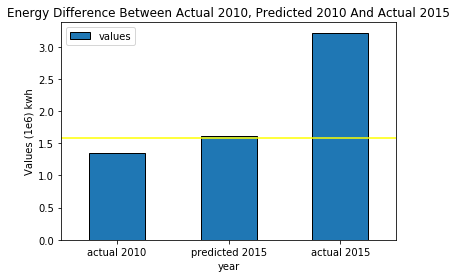

In [73]:
energy_comb = pd.DataFrame(data = 
                      {"year" : ["actual 2010", "predicted 2015", "actual 2015"], 
                       "values" : [actual_energy_2010/(10**6),projection_energy_2015/(10**6), actual_energy_2015/(10**6)]})

energy_bar = energy_comb.plot(kind='bar',x='year', y='values')
plt.title("Energy Difference Between Actual 2010, Predicted 2010 And Actual 2015")
plt.ylabel('Values (1e6) kwh');
plt.axhline(y=1574567.4/(10**6), color = "yellow")
plt.xticks(rotation=0)
energy_bar;

### <div style = "color:green">**IMPORTANT: Since we're not making a comparison bar plot, can you use Tables (not Pandas) to plot this graph? If you can't get the yellow line to show up it's find, but I think it's important to stay consistent with the package we use**</div>

### Question 3:
What can you tell from the bar graph? 

TYPE YOUR ANSWER

###  Cumulative volume in 2015 projection vs 2015 actual

#### What is the total amount of water predicted to be transported in 2010?

In [74]:
print ("The projected amount of volume in 2015 : " + str(volume_2015p))

The projected amount of volume in 2015 : 9456.0


#### What is the total amount of water transported in 2015?

In [75]:
print ("The actual amount of volume in 2015 : " + str(volume_2015))

The actual amount of volume in 2015 : 10795.0


#### What is the difference of volume of water transported between 2015 predicted and 2015 actual?

In [76]:
diff_v = volume_2015 - volume_2015p
print ("The actual amount of volume used in 2015 is " + str(diff_v) + " greater than the projected amount of volume")

The actual amount of volume used in 2015 is 1339.0 greater than the projected amount of volume


### Bar Graph
Let's make a bar graph showing the volume of water transported in actual 2010 data, predicted 2015 data, and actual 2015 data to observe the difference between prediction and actual data in 2015.

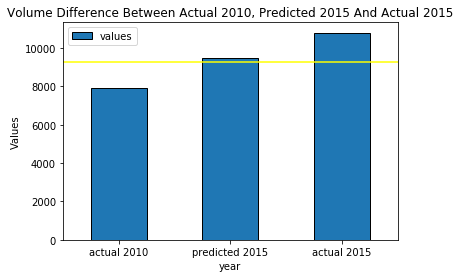

In [67]:
volume_comb = pd.DataFrame(data = 
                      {"year" : ["actual 2010", "predicted 2015", "actual 2015"], 
                       "values" : [volume_2010, volume_2015p, volume_2015]})
volume_bar = volume_comb.plot(kind='bar',x='year', y='values')
plt.title("Volume Difference Between Actual 2010, Predicted 2015 And Actual 2015")
plt.ylabel('Values');
plt.xticks(rotation=0)
plt.axhline(y=9280, color = "yellow")
volume_bar;

### Question 4:
What can you tell from the visualizatino above? What is siginificant about the data shown above?

TYPE YOUR ANSWER

## Discussion Questions

##### What do you think caused a significant increase in usage of energy and volume of water between 2010 and 2015?

TYPE YOUR ANSWER

##### What are the differences you can find between actual 2015 data and predicted 2015 data?

TYPE YOUR ANSWER

##### Can you connect information found through the energy flow chart and the analysis done with Cerritos Water Utility?

TYPE YOUR ANSWER

### <div style = "color:green"> IMPORTANT: Provide your Analysis! What should the students be noticing? What is the point of all of this analysis? Why are we seeing what we are seeing? Explain the impact of drought on these numbers.</div>

# PART IV. Can you do your own?

### Let's try to analyze your own utility!

## Actual 2010 vs 2015 Predicted



### Amount of energy used in 2010 vs 2015 projection

#### What is the total amount of energy used in 2010?

In [71]:
actual_energy_2010 = ...
print ("Amount of Energy used in 2010 : " + str(actual_energy_2010) + " kwh")

#### What is the total amount of energy predicted to be used in 2015?

In [72]:
projection_2015 = ...
print ("Amount of Energy used in 2015 projection : " + str(projection_2015) + " kwh")

#### What is the predicted percent increase of energy used between 2010 and 2015?

In [ ]:
diff_2010 = ...
percent = ...
print ("Transmission energy is expected to increase by " + str(percent) + "%")

### Cumulative volume change 2010 vs 2015 projection


#### What is the total amount of water transported in 2010?

In [ ]:
volume_2010 = ...
print ("Amount of volume used in 2010 : " + str(volume_2010))

#### What is the total amount of water predicted to be transported in 2015?

In [ ]:
volume_2015 = ...
print ("Amount of volume used in 2015 : " + str(volume_2015))

#### What is the predicted percent increase of cumulative volume of water transported between 2010 and 2015?

In [ ]:
percent_v = ...
print ("Volume of water expected to change by " + str(percent_v) + "% from 2010 and 2015")

#### Question 5:
What is expected to change in energy and water volume between 2010 and 2015 according to the data observed in 2010?

TYPE YOUR ANSWER

# Actual 2010 vs Actual 2015 

### Amount of energy used in 2010 vs 2015 



#### What is the total amount of energy used in 2010?

In [ ]:
energy = ...
print ("The total transmission_kwh in 2010 : " + str(energy) + " kwh")

#### What is the total amount of energy used in 2015?

In [ ]:
energy1 = ...
print ("The total transmission_kwh in 2015 : " + str(energy1) + " kwh")

#### What is the percent increase of energy used between 2010 and 2015?

In [ ]:
increase = ...
percentage_inc = ...
print ("The percentage increase of energy from 2010 to 2015 : " + str(percentage_inc) + "%")

### Cumulative volume change 2010 vs 2015 

#### What is the total amount of water transported in 2010?

In [ ]:
volume = ...
print ("The total volume of water transported in 2010: " + str(volume))

#### What is the total amount of water transported in 2015?

In [ ]:
volume1 = ...
print ("The total volume of water transported in 2015: " + str(volume1))

#### What is the percent increase of cumulative volume of water transported between 2010 and 2015?

In [ ]:
decrease = ...
percentage_dec = ...
print ("The percentage decrease of volume of water transported from 2010 to 2015 : " + str(percentage_dec) + " %")

#### Question 6:
What actually happened in change of energy and water volume between 2010 and 2015? How is it different from the prediction?

TYPE YOUR ANSWER

# 2015 projection vs 2015 actual

### Amount of energy used in 2015 predicted vs 2015  actual



#### What is the total amount of energy predicted to be used in 2015?

In [ ]:
projection = ...
print ("Amount of Energy used in 2015 projection : " + str(projection) + " kwh")

#### What is the total amount of energy used in 2015?

In [ ]:
actual = ...
print ("Amount of Energy used in 2015 : " + str(actual) + " kwh")

#### What is the difference of energy usage between 2015 predicted and 2015 actual?

In [ ]:
diff = ...
print ("The actual energy used in 2015 is " + str(diff) + " kwh" + " greater than the projection made in 2010")

###  Cumulative volume in 2015 projection vs 2015 actual

#### What is the total amount of water predicted to be transported in 2010?

In [ ]:
projection_v = ...
print ("The projected amount of volume in 2015 : " + str(projection_v))

#### What is the total amount of water transported in 2015?

In [ ]:
actual_v = ...
print ("The actual amount of volume in 2015 : " + str(actual_v))

#### What is the difference of volume of water transported between 2015 predicted and 2015 actual?

In [69]:
diff_v = ...
print ("The actual amount of volume used in 2015 is " + str(diff_v) + " (greater OR less) than the projected amount of volume")

# Graphs
Can you create visualization for difference in energy and water volume for your utility to show how the prediction for 2015 from actual 2015 data?

### Graph for the energy differences

In [ ]:
energy_comb = pd.DataFrame(data = 
                      {"year" : ["actual 2010", "predicted 2015", "actual 2015"], 
                       "values" : [..., ..., ...]})
energy_bar = energy_comb.plot(kind='bar',x='year', y='values')
plt.title("Energy Difference Between Actual 2010, Predicted 2010 And Actual 2015")
plt.ylabel('Values (1e6) kwh');
plt.xticks(rotation=0)
energy_bar;

### Graph for the volume of water differences

<div style = "color:green"> Up to this point, you haven't really explained how this code works. If you're having students fill out the code, you need to make sure you explain what the inputs are, how it works, and what you need the students to do. Keep in mind we're assuming NO CODING EXPERIENCE for these labs</div>

In [ ]:
volume_comb = pd.DataFrame(data = 
                      {"year" : ["actual 2010", "predicted 2015", "actual 2015"], 
                       "values" : [..., ..., ...]})
volume_bar = ...
plt.title("Volume Difference Between Actual 2010, Predicted 2015 And Actual 2015")
plt.ylabel('Values');
plt.xticks(rotation=0)
volume_bar;

# PART V. Big Data: All the Utilities in the United States

We have created a new table called test which contains both 2010 and 2015 data for all the utilities in the United States. From this data we will find a ratio between the total amount of energy consumed and the total amount of water trasnported to see the relationship between energy and water among actual 2010, actual 2015, and predicted 2015 data.

<div style = "color:green">Explain **WHY** we're interested in this Ratio in the context of the analysis you provided above (drought!).</div>

In [25]:
#import the table which has 2010 and 2015 data
test = Table().read_table('network.csv')

#multiply the cumulative_volume_af column and transmission_kwh/af column to calculate the total energy
test = test.with_column('Total Energy', test.column('cumulative_volume_af')*test.column("transmission_kwh/af"))

#Group by the year column to collect cumulative data for actual 2010, actual 2015, and predicted 2015 data.
test_group = test.group('year', sum)
test_group

year,data_year sum,source sum,target sum,cumulative_volume_af sum,transmission_kwh/af sum,treatment_kwh/af sum,used_vol_af sum,Total Energy sum
2010,1041180,,,6.64069e+06,87234.8,0,6.53952e+06,1.10632e+09
2015,745550,,,4.3739e+06,162506,0,4.3739e+06,2.70958e+09
Predicted 2015,1115550,,,8.03714e+06,94854.8,0,7.93035e+06,1.33226e+09


Divide the Total Energy sum column by the transmission_kwh/af sum column to calculate the ratio between energy and water.



In [26]:
#Ratio
ratios = test_group.column('Total Energy sum') / test_group.column('cumulative_volume_af sum')
test_group = test_group.with_column('energy per volume', ratios)
test_group

year,data_year sum,source sum,target sum,cumulative_volume_af sum,transmission_kwh/af sum,treatment_kwh/af sum,used_vol_af sum,Total Energy sum,energy per volume
2010,1041180,,,6.64069e+06,87234.8,0,6.53952e+06,1.10632e+09,166.598
2015,745550,,,4.3739e+06,162506,0,4.3739e+06,2.70958e+09,619.489
Predicted 2015,1115550,,,8.03714e+06,94854.8,0,7.93035e+06,1.33226e+09,165.763


From the ratio found by dividing total amount of energy used by the total volume of water, we can wee that the ratio was significantly higher for 2015. In 2010, California consumed 1.10632 Billion kwh (kilowatt per hour) of energy to transport 6.64069 Million (units) of water. The amount of water transported in 2015 was predicted at that time to increase, so the total energy consumed was also predicted to increase by a small amount. However, the data shows that in 2015, the amount of water transported actually reduced to 4.3739 Million (units) of water, but the total energy expended increased significantly to 2.70958 Billion kwh, which is much higher than the predicted increase in energy (which also predicted that water transports would increase).

#### How did this happen? What do you think caused this change? 



TYPE YOUR ANSWER

#### How does the cumulative data compare to your own utility? Did your utility have a similar trend as the cumulative data?

TYPE YOUR ANSWER

# DONE
You are now done! 